In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('price_rent_department_in_hanoi.csv')
data.head()

,Đường/Phố,Xã/Phường/Thị Trấn,Quận/Huyện,Diện tích,Giá,Số tầng,Số phòng ngủ,Số toilet
0,Nguyễn Hoàng,Mỹ Đình 1,Nam Từ Liêm,55.0,32.0,7.0,NaN,NaN
1,Tô Ngọc Vân,Quảng An,Tây Hồ,200.0,160.0,NaN,NaN,NaN
2,Xóm Chùa,Quảng An,Tây Hồ,400.0,28.0,NaN,NaN,NaN
3,Võ Chí Công,Nghĩa Đô,Cầu Giấy,125.0,75.0,NaN,NaN,NaN
4,Mạc Thái Tông,Trung Hòa,Cầu Giấy,95.0,45.0,4.0,NaN,NaN


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Đường/Phố           1463 non-null   object 
 1   Xã/Phường/Thị Trấn  1463 non-null   object 
 2   Quận/Huyện          1463 non-null   object 
 3   Diện tích           1463 non-null   float64
 4   Giá                 1429 non-null   float64
 5   Số tầng             1218 non-null   float64
 6   Số phòng ngủ        898 non-null    float64
 7   Số toilet           812 non-null    float64
dtypes: float64(5), object(3)
memory usage: 91.6+ KB


In [179]:
data.nunique()

Đường/Phố             348
Xã/Phường/Thị Trấn    160
Quận/Huyện             18
Diện tích             127
Giá                   112
Số tầng                11
Số phòng ngủ           16
Số toilet              15
dtype: int64

In [180]:
for i in list(data.columns):
    if data[i].isnull().sum() >= 0:
        print(i, ': ', data[i].isnull().sum())

Đường/Phố :  0
Xã/Phường/Thị Trấn :  0
Quận/Huyện :  0
Diện tích :  0
Giá :  34
Số tầng :  245
Số phòng ngủ :  565
Số toilet :  651


In [181]:
data['Giá'].unique()

array([ 32.  , 160.  ,  28.  ,  75.  ,  45.  ,  26.  ,  30.  ,  42.  ,
        38.  ,  10.  ,  14.  ,   6.5 ,  50.  ,  12.  ,  18.  ,  19.  ,
        17.  ,  33.  ,  16.  ,  25.  ,  22.  ,  23.  ,  36.  ,  40.  ,
       110.  , 120.  ,  60.  ,  55.  ,  85.  ,  52.  ,  70.  ,  47.  ,
       132.  ,  13.  ,  24.  , 130.  ,  27.  ,    nan,  35.  , 150.  ,
         7.  ,  13.5 ,  14.8 ,   3.  ,   5.  ,   6.  ,  90.  ,  95.  ,
       100.  , 165.  ,  10.5 ,   3.5 ,  20.  ,  15.  , 276.  ,  18.5 ,
        65.  ,  53.  ,   4.3 ,  48.  , 210.  ,   2.5 ,   9.  ,  59.  ,
         6.2 ,  15.9 ,   8.  ,  21.  ,  43.  ,   2.  ,   7.5 , 135.  ,
        16.5 ,   7.99,   4.  ,  15.7 ,  11.  ,  29.  ,  49.  , 138.  ,
       123.  ,   5.5 ,  62.  ,   8.5 ,  68.  , 470.  , 115.  ,  80.  ,
        58.  , 180.  , 148.  ,  14.5 ,  39.  ,   4.5 ,  12.5 ,   2.6 ,
        46.  ,   9.5 , 598.  ,  45.5 ,   4.6 ,   3.3 ,   9.9 ,  31.  ,
        51.1 ,  17.5 ,  11.5 ,  10.4 ,  35.6 ,  26.5 , 350.  ,  37.  ,
      

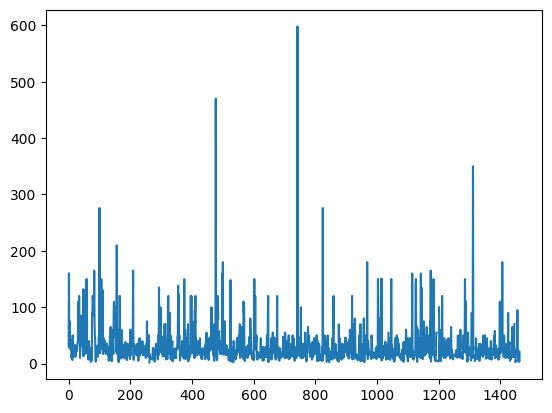

In [182]:
plt.plot(data['Giá'])

In [183]:
data['Giá'] = data['Giá'].replace(np.nan,data['Giá'].mean())
data['Số tầng'] = data['Số tầng'].replace(np.nan,np.trunc(data['Số tầng'].mean()))
data['Số phòng ngủ'] = data['Số phòng ngủ'].replace(np.nan,np.trunc(data['Số phòng ngủ'].mean()))
data['Số toilet'] = data['Số toilet'].replace(np.nan,np.trunc(data['Số toilet'].mean()))
data

,Đường/Phố,Xã/Phường/Thị Trấn,Quận/Huyện,Diện tích,Giá,Số tầng,Số phòng ngủ,Số toilet
0,Nguyễn Hoàng,Mỹ Đình 1,Nam Từ Liêm,55.0,32.0,7.0,4.0,4.0
1,Tô Ngọc Vân,Quảng An,Tây Hồ,200.0,160.0,4.0,4.0,4.0
2,Xóm Chùa,Quảng An,Tây Hồ,400.0,28.0,4.0,4.0,4.0
3,Võ Chí Công,Nghĩa Đô,Cầu Giấy,125.0,75.0,4.0,4.0,4.0
4,Mạc Thái Tông,Trung Hòa,Cầu Giấy,95.0,45.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
1458,Quốc lộ 3,Mai Lâm,Đông Anh,80.0,5.0,3.0,2.0,2.0
1459,Lý Sơn,Ngọc Thụy,Long Biên,70.0,4.0,2.0,3.0,2.0
1460,Trần Quốc Toản,Hàng Trống,Hoàn Kiếm,12.0,3.0,2.0,4.0,4.0
1461,Đào Tấn,Ngọc Khánh,Ba Đình,80.0,22.0,4.0,3.0,4.0


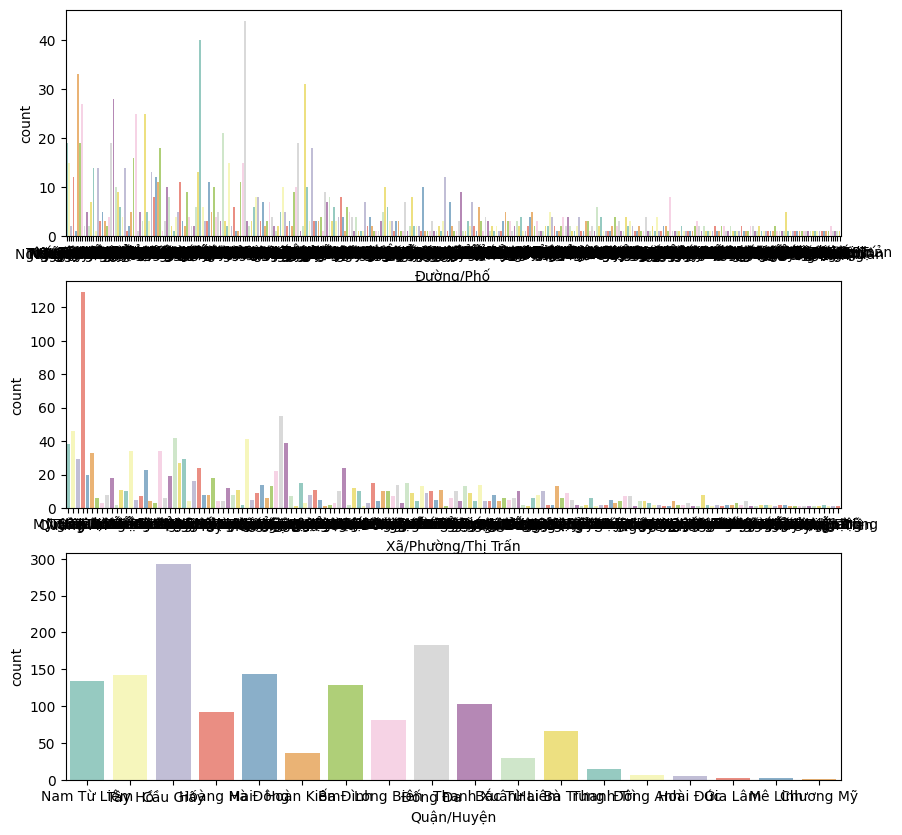

In [184]:
cat_features = np.array([i for i in data.columns.tolist() if data[i].dtype == 'object'])
f,ax = plt.subplots(3,1,figsize=(10,10))
k=0

for j in range(3):
    if k<4:
        sns.countplot(x=cat_features[k], data=data, ax=ax[j], palette='Set3')
        k=k+1

In [185]:
def outliers(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = [index for index,x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return outliers

In [186]:
cont_features = np.array([i for i in data.columns.tolist() if data[i].dtype != 'object'])
raws = []
raws += outliers(data['Giá'])
len(set(raws))

67

In [187]:
list(set(raws))

[1,
 1285,
 647,
 1288,
 396,
 525,
 398,
 147,
 148,
 1046,
 919,
 1174,
 411,
 156,
 1181,
 31,
 1183,
 1311,
 34,
 676,
 165,
 166,
 293,
 298,
 47,
 1201,
 52,
 567,
 824,
 569,
 58,
 1211,
 322,
 323,
 968,
 78,
 79,
 463,
 209,
 82,
 83,
 602,
 859,
 1114,
 477,
 478,
 605,
 355,
 100,
 357,
 484,
 742,
 1125,
 1126,
 106,
 1003,
 110,
 753,
 498,
 500,
 1013,
 1142,
 375,
 1016,
 1398,
 1144,
 1406]

In [188]:
data.drop(list(set(raws)), axis=0, inplace=True)

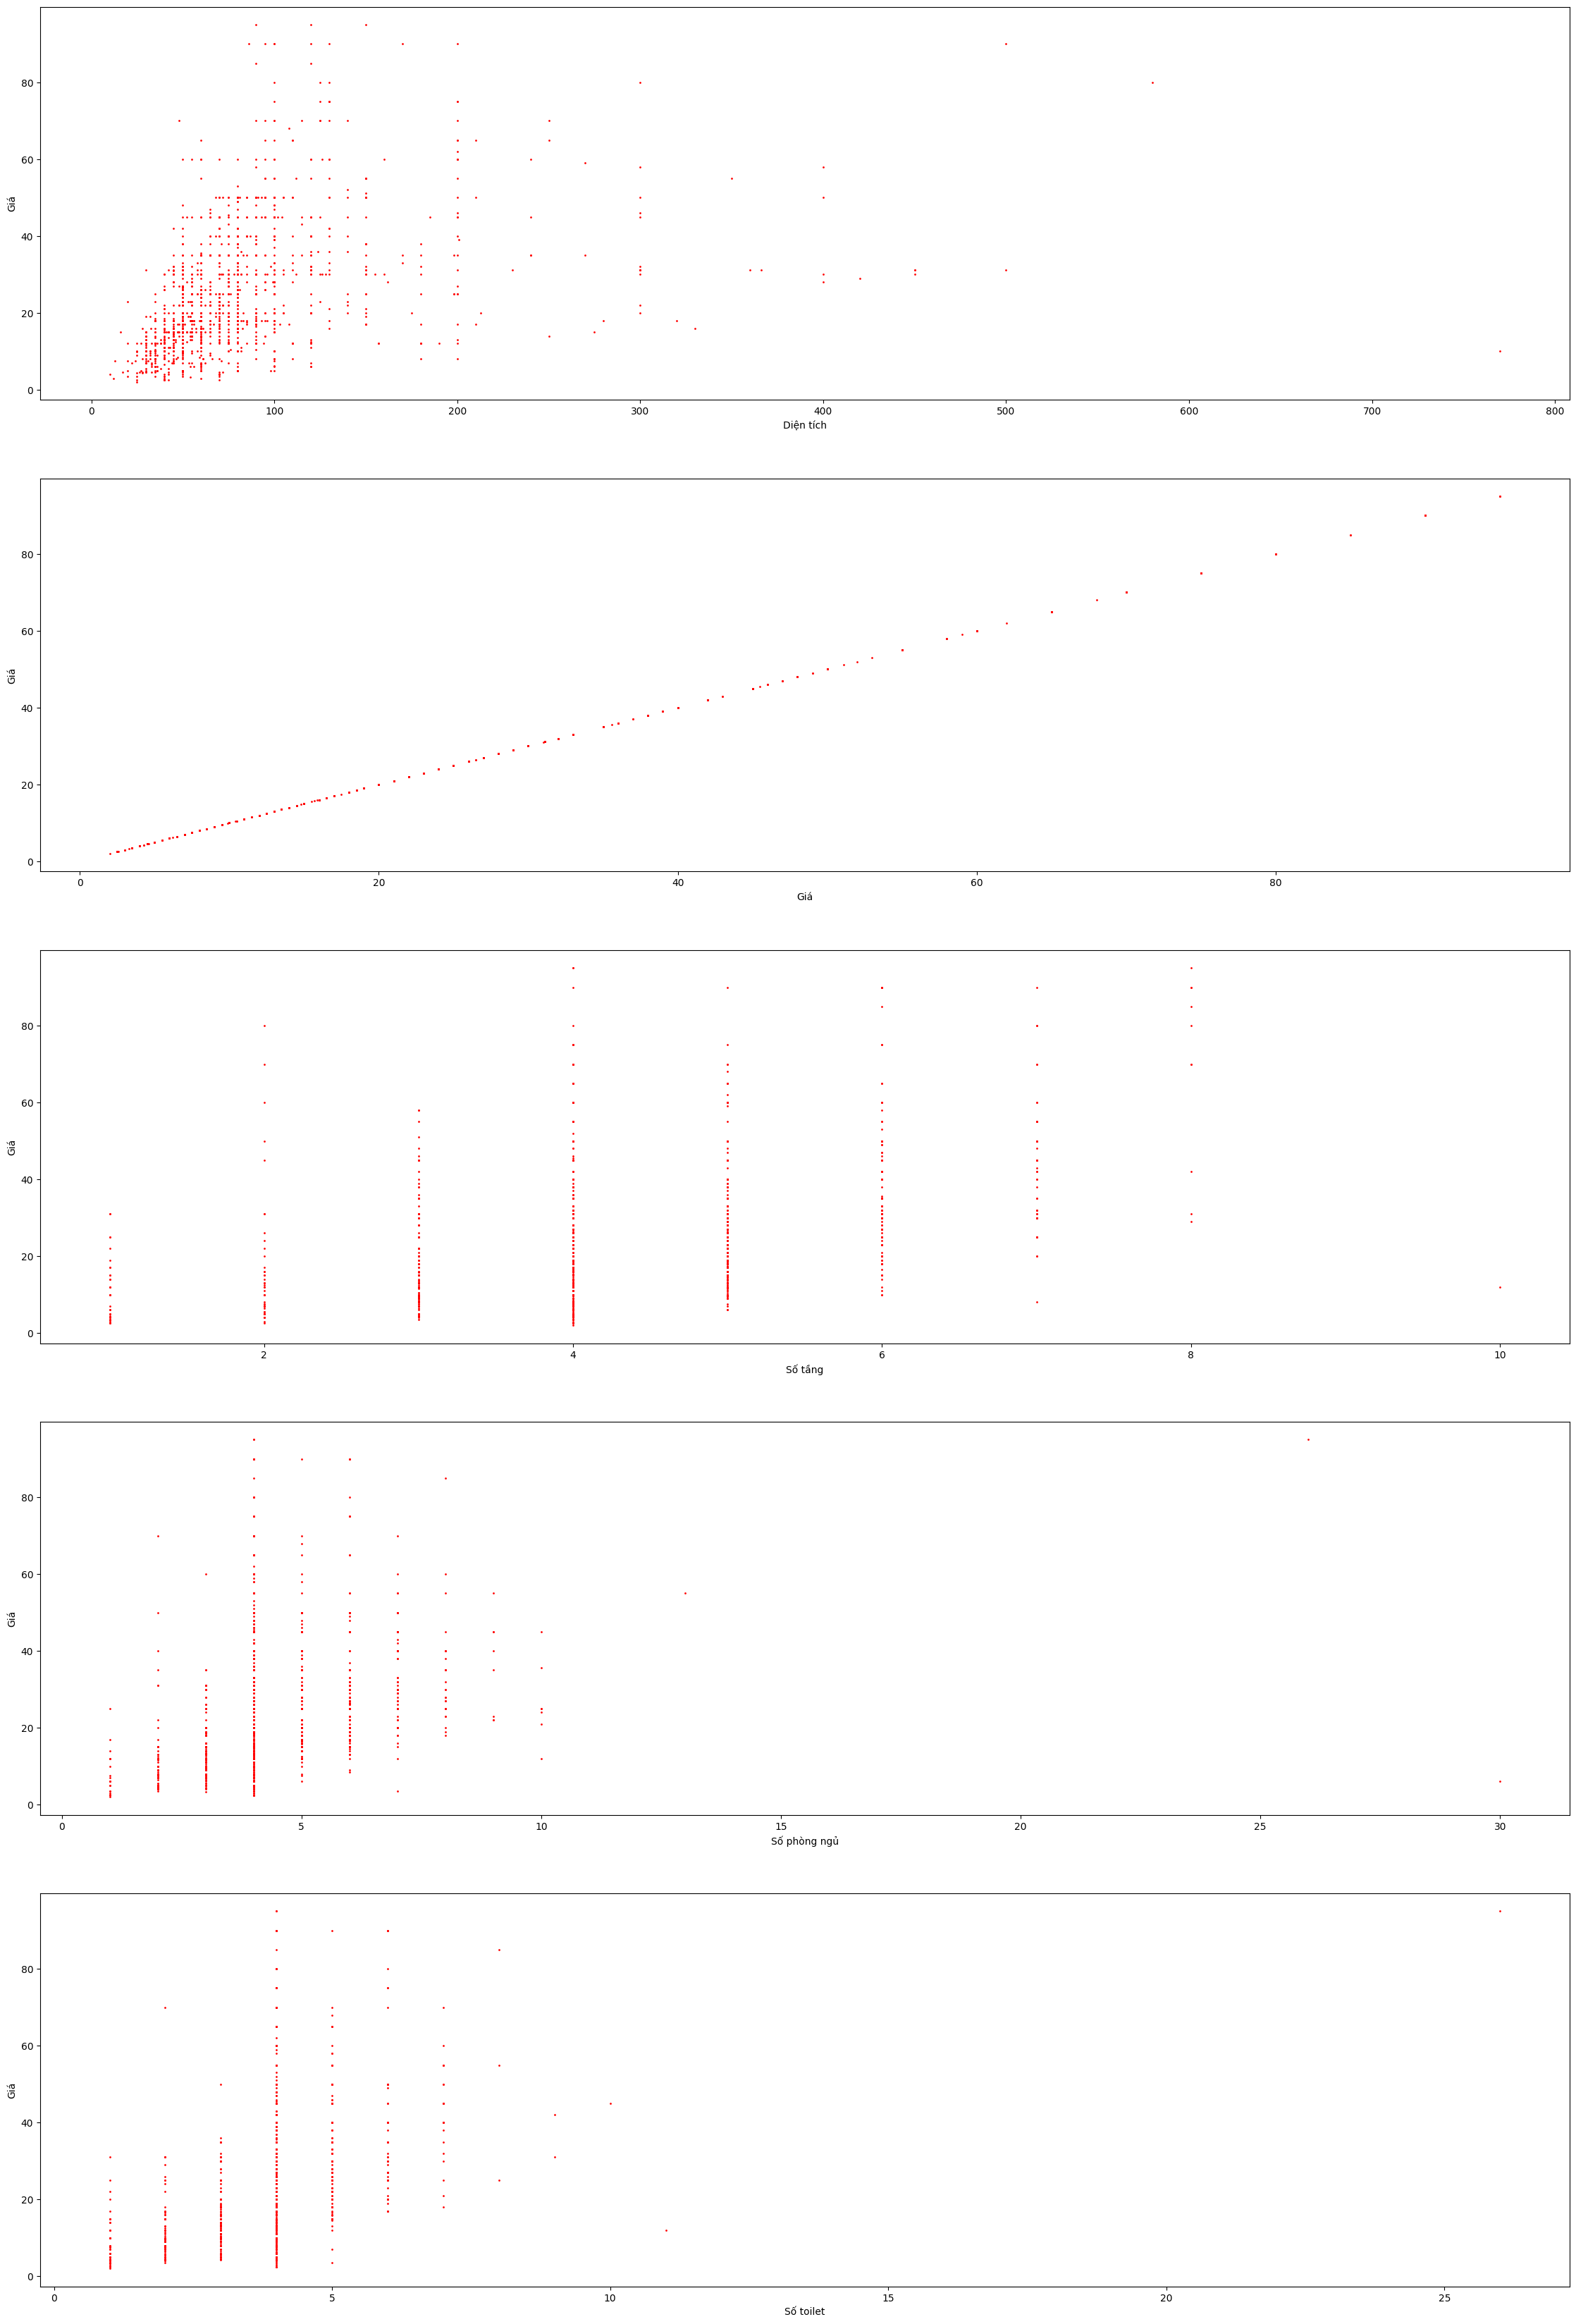

In [189]:
f,ax = plt.subplots(5,1, figsize=(28,42))
k=0
for j in range(5):
    if k<5:
        ax[j].scatter(x=cont_features[k], y='Giá', data=data, s=1, c='red')
        ax[j].set_xlabel(cont_features[k])
        ax[j].set_ylabel('Giá')
        k=k+1
plt.show()

In [190]:
X = data.drop(['Giá'],axis=1)
y = data['Giá']
duongpho = data['Đường/Phố'].unique()
quanhuyen = data['Quận/Huyện'].unique()
xaphuong = data['Xã/Phường/Thị Trấn'].unique()


In [191]:
cat_features = np.array([i for i in data.columns.tolist() if data[i].dtype == 'object'])
cont_features = np.array([i for i in data.columns.tolist() if data[i].dtype != 'object'])

In [192]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer

# ohe=OneHotEncoder()
# ohe.fit(X[['Đường/Phố','Quận/Huyện','Xã/Phường/Thị Trấn']])
# column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Đường/Phố','Quận/Huyện','Xã/Phường/Thị Trấn']),
#                                     remainder='passthrough')

<Axes: >

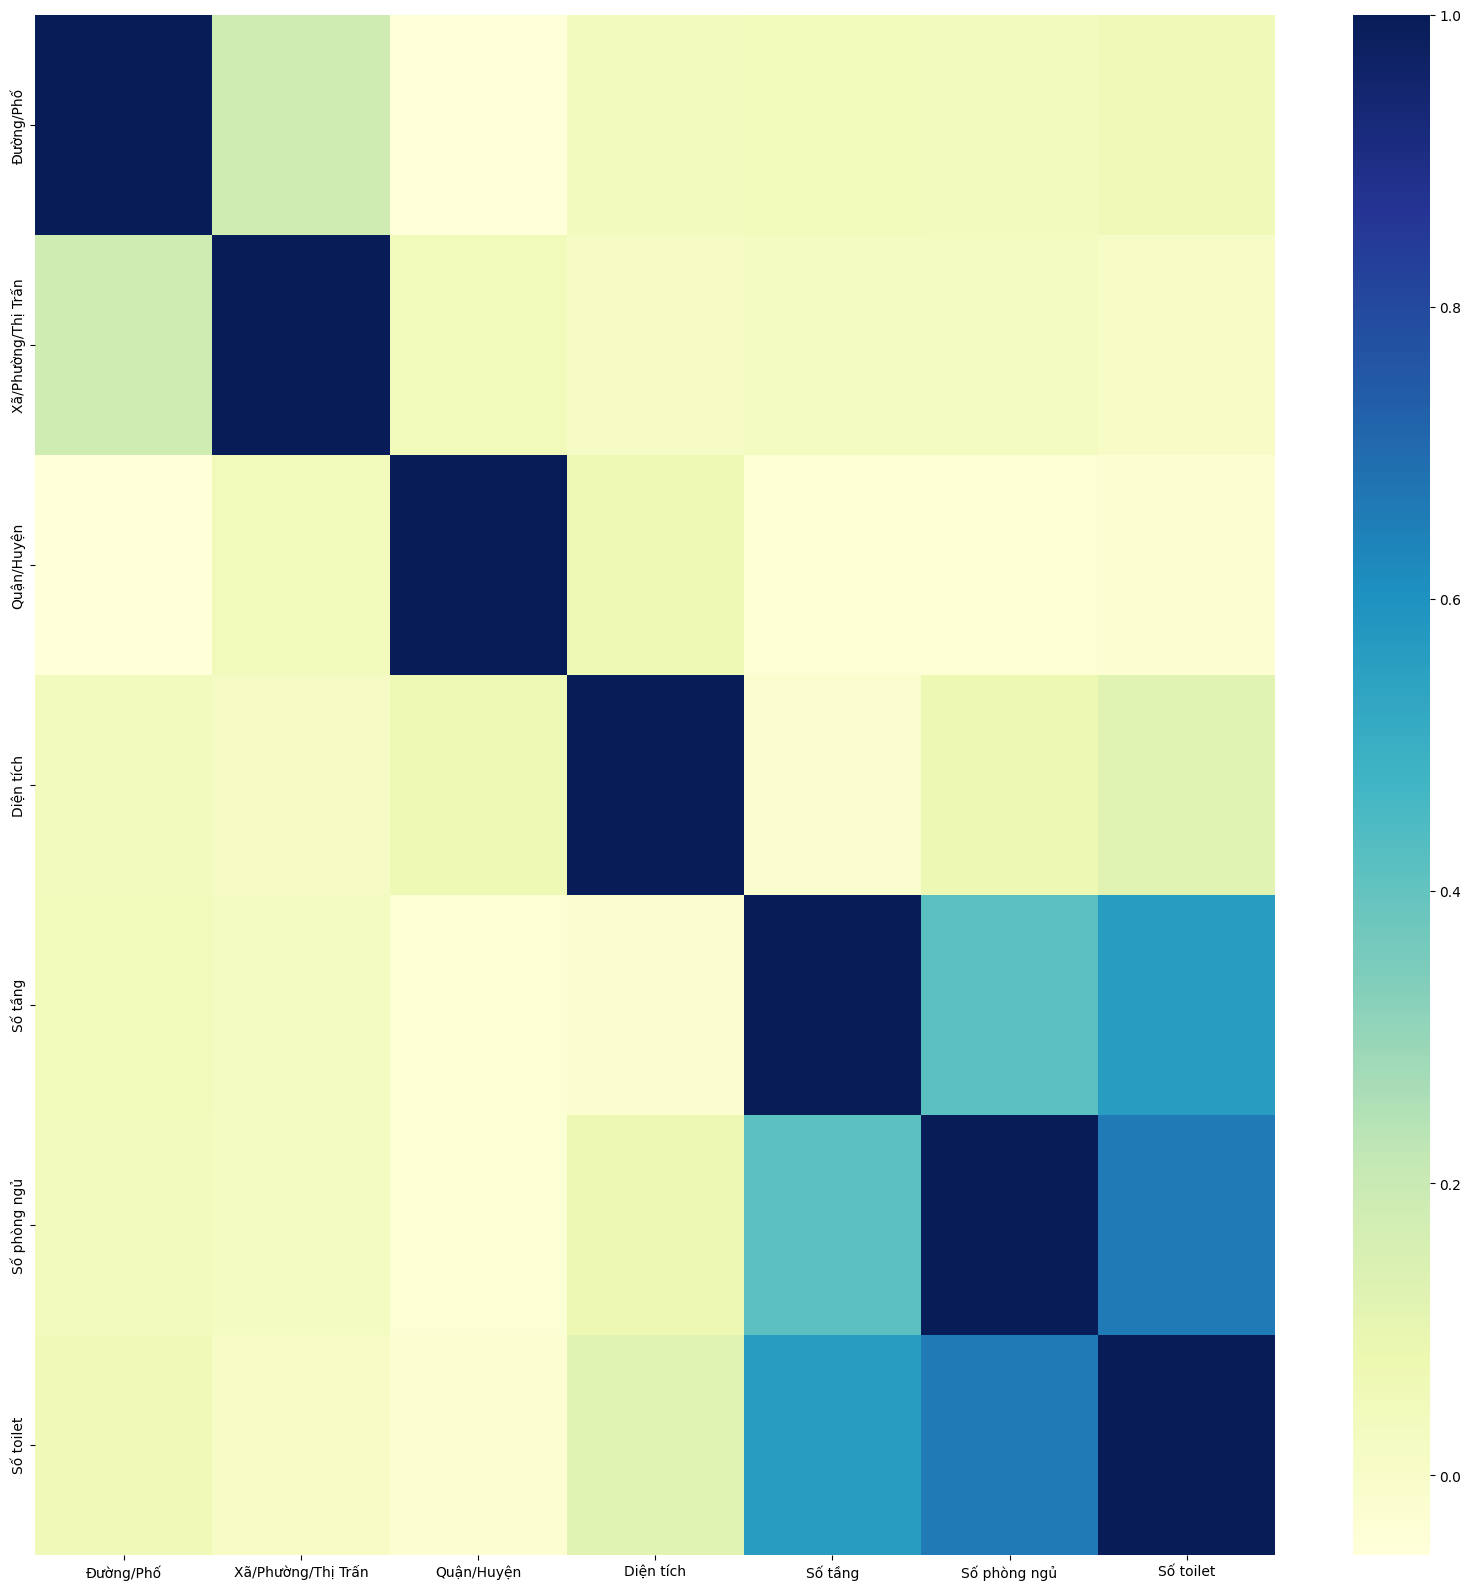

In [193]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')

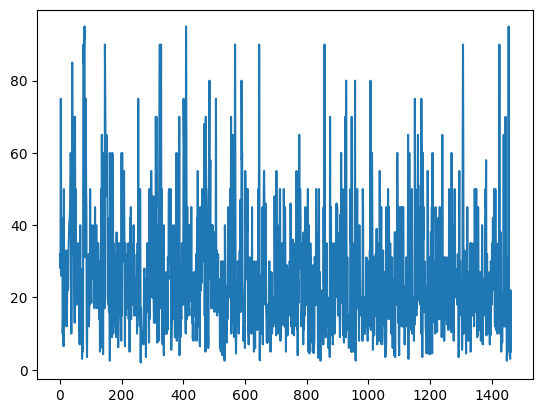

In [194]:
plt.plot(data['Giá'])

<Axes: >

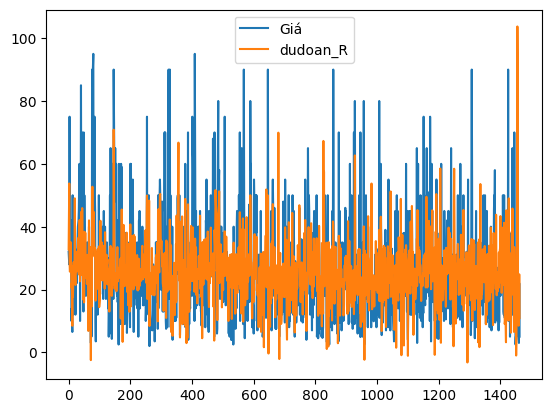

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

data['dudoan_R']=model.predict(X)
data[['Giá','dudoan_R']].plot()

In [196]:
a=np.sqrt(pow(data['dudoan_R']-data['Giá'],2).mean())
print(a)

13.259222281843469


<Axes: >

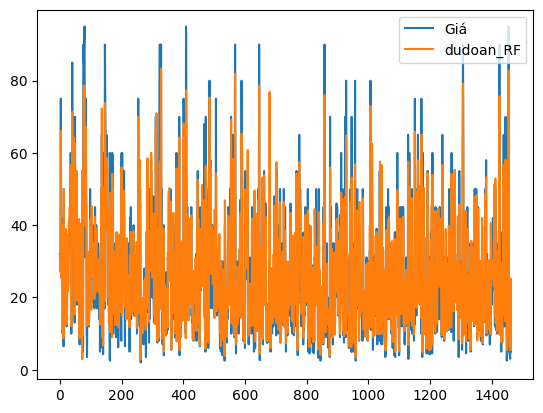

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
filename1 = 'model_Random_Forest.sav'
pickle.dump(rf, open(filename1, 'wb'))
data['dudoan_RF']=rf.predict(X)
data[['Giá','dudoan_RF']].plot()

In [198]:
b=np.sqrt(pow(data['dudoan_RF']-data['Giá'],2).mean())
print(b)


6.141447289566898
